In [1]:
import sys
sys.path.append('../functions/')
import tifffile as tiff
from os import listdir
from os.path import isfile, join
from metrics import f1
from features import BasisTransformer
import numpy as np

/home/will/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
x = np.array([tiff.imread(join('../data/', f)) for f in listdir('../data/') if isfile(join('../data/', f)) and not 'annotations' in f])
y = tiff.imread('../data/collman_collman14v2_0_9888_0_7936_0_39_annotations.tiff')

In [3]:
transformer = BasisTransformer()
x_test_transformed = transformer.fit_transform(x)

100%|██████████| 13/13 [00:09<00:00,  1.34pair/s]


In [5]:
x.shape

(13, 39, 248, 309)

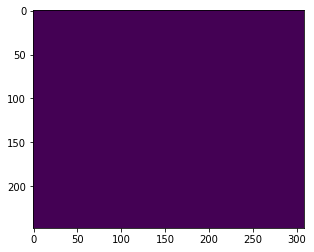

In [43]:
import matplotlib.pyplot as plt
plt.imshow(x[12][0] * 255.0)